# Project: Investigate Medical Appointment No Shows Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be analyzing data associated with Medical Appointments of patients show up, In particular we will be focusing in finding the factors that important for us to know in order to predict if a patient will show up for their scheduled appointment
the questions we will try to answer in this analysis is:
 * Dose women aren't showing up in appointment more than men?
 * What age group associated with highest not show up rate?
 * What Neighborhood has the most not showing up rate?
 * is the delay between scheduledDay  and appointmentDay affecting whether or not patients will show up?
 * Dose patients without Scholarship not show up more?
 * What is the relation between patients with Diabetes and not showing up?
 * How likely Alcoholism patients will not show up?
 * Dose patients with Handcap not show up more?
 * Is SMS message affecting whether or not patients will show up?

here is a link to the orginal data set: [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments)


In [1]:
# import statements for all of the packages we plan to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

print("lets gooo!")


lets gooo!


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#  check the dimensions of the data frame
df.shape

(110527, 14)

we can see that we have 110527 rows and 14 columns.

In [4]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

the data types looks good, but we need to change `ScheduledDay` and `AppointmentDay` from string to date, and i feel i want to change the last column `No-show` from string to int because it's make dealing with the column much faster, also i might change the column names to lower case to make it easier to acsess.

In [5]:
# this displays a concise summary of the dataframe,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Great clean data with out any nullabe values.

In [6]:
# this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

the `Handcap` has more than 2 values, but in the description it says should only has 1 or 0, True or False, i will replace the positive values with 1, on the other hand `SMS_received` has 2 values only but in description it says: `1 or more messages sent to the patient.`, i don't know what to do with it so we leave it as it is.

In [7]:
# this returns useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We notice that `Age` has negative value which is not allowed and needs to be cleaned

In [8]:
# this returns the number of duplicated rows
df.duplicated().sum()

0

Great we don't have any duplicates to drop.

### Data Cleaning 
we decide to make those changes:
* drop unneeded columns: ( `PatientId`, `AppointmentID`)
* rename columns to lowercase
* change `ScheduledDay` and `AppointmentDay` from string to date
* change the last column `No-show` from string to int (1, 0)
* replace the positive values of `Handcap` with 1
* remove the rows with negative `Age` values 

In [9]:
# drop unneeded columns: ( PatientId, AppointmentID)
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


`PatientId` and `AppointmentID` is clear why We don't need them in our analysis, the `Neighbourhood` is tricky i want to analyze it there is a lot of Neighbourhood

In [10]:
# rename columns to lowercase
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


That make it easier to work with 

In [11]:
# change ScheduledDay and AppointmentDay from string to date
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                        object
dtype: object

In [12]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


We will not use the hours of `scheduledday`, `appointmentday` so we will just take the date to make it look better.

In [13]:
df['scheduledday'] = df['scheduledday'].dt.date
df['appointmentday'] = df['appointmentday'].dt.date
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
df.dtypes

gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hipertension       int64
diabetes           int64
alcoholism         int64
handcap            int64
sms_received       int64
no_show           object
dtype: object

We have a problem now because the `scheduledday`, and `appointmentday` returned to be as string type, we can fix simply converting back

In [15]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'], utc=False)
df['appointmentday'] = pd.to_datetime(df['appointmentday'], utc=False)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [16]:
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

Perfect, i don't know if i there was a faster way to do it, please let me know if you have one.

In [17]:
# change the last column No-show from string to int (1, 0)
df.replace(["Yes", "No"], [1, 0], inplace=True)
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                    int64
dtype: object

Again this will make dealing with the column much faster

In [18]:
# replace the positive values of Handcap with 1
mask = df.handcap > 1
df.loc[mask, 'handcap'] = 1
df.handcap.value_counts()

0    108286
1      2241
Name: handcap, dtype: int64

As i said before in orginal data description the owner said it has only two values 1 or 0, True or False.

In [19]:
# remove the rows with negative Age values
mask = df['age'] < 0
df[ mask ]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0


In [20]:
indexes = df[ mask ].index
df.drop(indexes, inplace = True)

In [21]:
df.query("age < 0")

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


Great, we finished the Data wrangling part and know we will move to the part that scares me, wish me luck :(

<a id='eda'></a>
## Exploratory Data Analysis

* Dose women aren't showing up in appointment more than men?
* What age group associated with highest not show up rate?
* What Neighborhood has the most not showing up rate?
* is the delay between scheduledDay  and appointmentDay affecting whether or not patients will show up?
* Dose patients without Scholarship not show up more?
* What is the relation between patients with Diabetes and not showing up?
* How likely Alcoholism patients will not show up?
* Dose patients with Handcap not show up more?
* Is SMS message affecting whether or not patients will show up?

First i want to check  the overall no show up rate

In [22]:
df.no_show.mean()

0.20193438647919945

we can see that `20%` of patients do not show up, now we will move to the questions.
### Dose women aren't showing up in appointment more than men?

In [23]:
# first we want to see how many males and how many females we have
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [24]:
num_male = df.gender.value_counts()['M']
num_female = df.gender.value_counts()['F']
total_gender = df.shape[0]

In [25]:
# proportions of male and female
prop_male = num_male/total_gender
prop_female = num_female/total_gender
prop_male, prop_female

(0.3500262381702043, 0.6499737618297957)

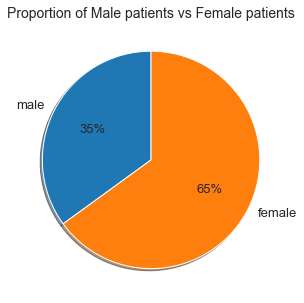

In [81]:
# plt.subplots(figsize=(6,5)) 
# plt.bar(["male", "female"], [prop_male, prop_female])
# plt.xticks(fontsize=11)
# plt.title("Proportion of Male patients vs Female patients", fontsize=14)
# plt.xlabel("Gender", fontsize=14)
# plt.ylabel("Proportion", fontsize=14);

plt.subplots(figsize=(5,5)) 
plt.pie([num_male, num_female],  labels=["male", "female"], autopct='%1.0f%%',
        shadow=True, startangle=90,textprops={'fontsize': 13})
plt.title("Proportion of Male patients vs Female patients", fontsize=14);


We can see that Women are more eager to go to hospital

In [27]:
# number of no show ups per gender
df.groupby('gender')['no_show'].sum()

gender
F    14594
M     7725
Name: no_show, dtype: int64

In [28]:
male_no_show = df.groupby('gender')['no_show'].sum()['M']
female_no_show = df.groupby('gender')['no_show'].sum()['F']
male_no_show, female_no_show

(7725, 14594)

In [29]:
# proportions of no shows of male and female
prop_male = male_no_show/num_male
prop_female = female_no_show/num_female
prop_male, prop_female

(0.19967947889471915, 0.20314870752655242)

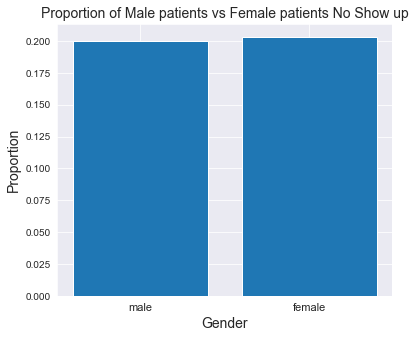

In [30]:
plt.subplots(figsize=(6,5)) 
plt.bar(["male", "female"], [prop_male, prop_female])
plt.xticks(fontsize=11)
plt.title("Proportion of Male patients vs Female patients No Show up", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Proportion", fontsize=14);

We can not say for sure that if there any deffrence but an important note is the number of female patients was more than male patients by 29% so that may affected the result, but for now we say that gender is not an important factor of appointment No shows.
### What age group associated with highest not show up rate? 

<AxesSubplot:>

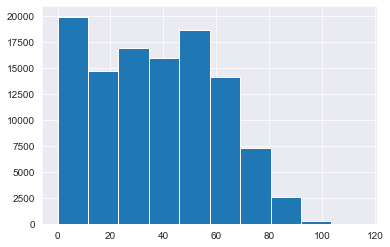

In [31]:
# plotting the histogram of age column
df.age.hist()

i will add column about  groups of ages to make it easier to analysis, i was confused about how to make the determine the age groups i mean how many group should i put and how to divide them ?, but i decide to go with this.
* (0-14)
* (15-29)
* (30-44)
* (45-59)
* (60-74)
* (+75)

please let me now if there a better way to divide the age group

In [32]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1 ,14 ,29 ,44 ,59, 74, df.age.max() ] 
# Labels for the four age groups
bin_names = ["0-14" ,"15-29" , "30-44", "45-59", "60-74", "+75"] 

In [33]:
# Creates age groups column
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_groups
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,60-74


In [83]:
size = df.groupby("age_groups")['gender'].count()
size

age_groups
0-14     23257
15-29    20853
30-44    22022
45-59    23221
60-74    15237
+75       5936
Name: gender, dtype: int64

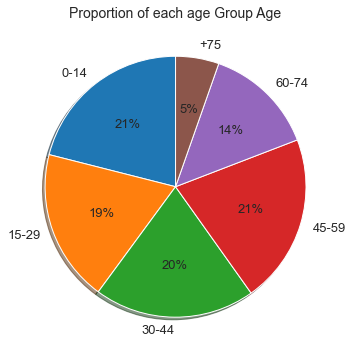

In [82]:
# check the propotion of each group
size = df.groupby("age_groups")['gender'].count()
plt.subplots(figsize=(6,6)) 
plt.pie(size,  labels=bin_names, autopct='%1.0f%%',
        shadow=True, startangle=90, textprops={'fontsize': 13});
plt.title("Proportion of each age Group Age", fontsize=14);


In [34]:
# propotion of no show up rate for each group
prop_ages_no_shows = df.groupby("age_groups")['no_show'].mean()
prop_ages_no_shows

age_groups
0-14     0.211807
15-29    0.249125
30-44    0.218236
45-59    0.178718
60-74    0.150358
+75      0.160209
Name: no_show, dtype: float64

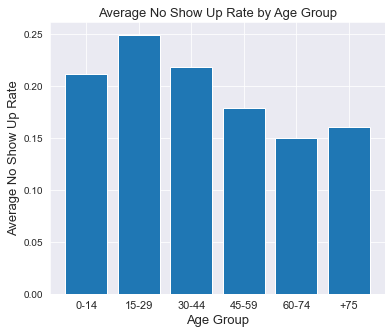

In [64]:
# Create a bar chart with proper labels
# locations = [4, 1, 2, 3]  # reorder values above to go from low to high
heights = prop_ages_no_shows

labels = bin_names
plt.subplots(figsize=(6,5)) 

plt.bar(labels, heights)
plt.xticks(fontsize=11)
plt.title('Average No Show Up Rate by Age Group', fontsize=13)
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Average No Show Up Rate', fontsize=13);

The trend shows that young patients tend to not show up more than old patients, also to answer the question the (15-29) age group has the highest not show up rate by 25%
### What Neighborhood has the most not showing up rate?

In [36]:
nabor_no_shows = df.groupby("neighbourhood")['no_show'].mean()
max_neighbor = nabor_no_shows.idxmax()
max_neighbor

'ILHAS OCEÂNICAS DE TRINDADE'

In [37]:
df.query("neighbourhood == 'ILHAS OCEÂNICAS DE TRINDADE'")

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_groups
48754,F,2016-04-14,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,45-59
48765,F,2016-04-14,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,45-59


The problem is there is only two patients with this Neighbourhood

In [38]:
nabor_no_shows = nabor_no_shows.sort_values(ascending=False)
nabor_no_shows

neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
                                 ...   
SOLON BORGES                   0.147122
MÁRIO CYPRESTE                 0.145553
AEROPORTO                      0.125000
ILHA DO BOI                    0.085714
PARQUE INDUSTRIAL              0.000000
Name: no_show, Length: 81, dtype: float64

In [39]:
nabor_no_shows.drop('ILHAS OCEÂNICAS DE TRINDADE')

neighbourhood
SANTOS DUMONT        0.289185
SANTA CECÍLIA        0.274554
SANTA CLARA          0.264822
ITARARÉ              0.262664
JESUS DE NAZARETH    0.243954
                       ...   
SOLON BORGES         0.147122
MÁRIO CYPRESTE       0.145553
AEROPORTO            0.125000
ILHA DO BOI          0.085714
PARQUE INDUSTRIAL    0.000000
Name: no_show, Length: 80, dtype: float64

In [40]:
df.query("neighbourhood == 'SANTOS DUMONT'").shape[0]

1276

That number of patients is good enouph in my opinion, so the `SANTOS DUMONT` has highest not show up rate, which is `29%`.
i did not plot this because there is to many neighbourhoods.
### is the delay between scheduledDay  and appointmentDay affecting whether or not patients will show up?
`scheduledDay` means the day a patient make their appointment, `appointmentDay` means the actual appointment Day

In [41]:
# first i want to create new column which is delay
df['delay'] = (df['appointmentday'] - df['scheduledday'] ).dt.days
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_groups,delay
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,60-74,0


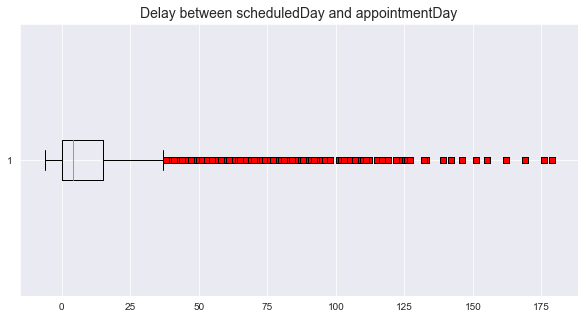

In [92]:
# check the delay boxplot
red_square = dict(markerfacecolor='r', marker='s')
plt.subplots(figsize=(10,5))
plt.title('Delay between scheduledDay and appointmentDay', fontsize=14)
plt.boxplot(df['delay'], vert=False, flierprops=red_square);

We can see most of delay between 0 and 20 days, also there is a lot of outliers that may affect the analysis, right know we did not study how to deal with outliers.

In [93]:
# creat mask of no-show up vs show up
no_show = df.no_show == 1
show_up = df.no_show == 0

In [94]:
# look at mean for each mask
df.delay[no_show].mean()

15.83148886598862

In [95]:
df.delay[show_up].mean()

8.754758692620767

The mean shows that the delay affect the possibility of the no showing up, because in average the patients who did not show up waited 16 day, but the patients who show up waited in average 9 days

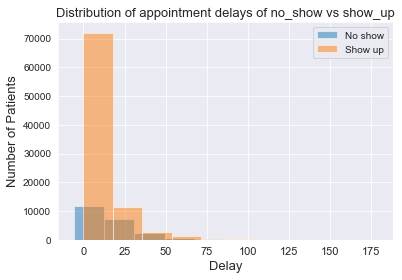

In [96]:
#  plotting the distribution of appointment delays of no_show vs show_up
df.delay[no_show].hist(alpha=0.5, label= 'No show', xlabelsize = 5)
df.delay[show_up].hist(alpha=0.5, label= 'Show up', xlabelsize = 5)
plt.legend()
plt.xticks(fontsize=11)
plt.title('Distribution of appointment delays of no_show vs show_up', fontsize=13)
plt.xlabel('Delay', fontsize=13)
plt.ylabel('Number of Patients', fontsize=13);

We can see that people who show up has less delay in their appointments.
### Dose patients without Scholarship not show up more?
Scholarship means financial aid to poor Brazilian families, read more: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

In [97]:
scholar = df.groupby('scholarship')['no_show'].mean()
scholar

scholarship
0    0.198074
1    0.237363
Name: no_show, dtype: float64

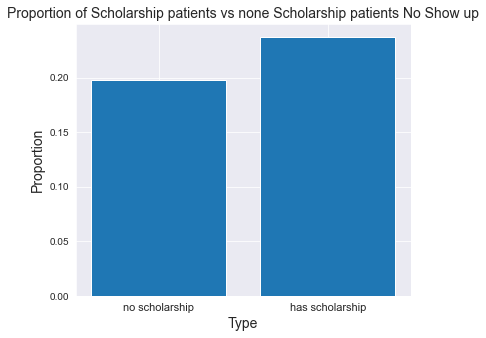

In [98]:
plt.subplots(figsize=(6,5)) 
plt.bar(["no scholarship", "has scholarship"], scholar)
plt.xticks(fontsize=11)
plt.title("Proportion of Scholarship patients vs none Scholarship patients No Show up", fontsize=14)
plt.xlabel("Type", fontsize=14)
plt.ylabel("Proportion", fontsize=14);

This one is suprising i thought patients with financial aid will show up more.
### What is the relation between patients with Diabetes and not showing up?

In [99]:
diabetes = df.groupby('diabetes')['no_show'].mean()
diabetes

diabetes
0    0.203630
1    0.180033
Name: no_show, dtype: float64

In [100]:
df.diabetes.sum()

7943

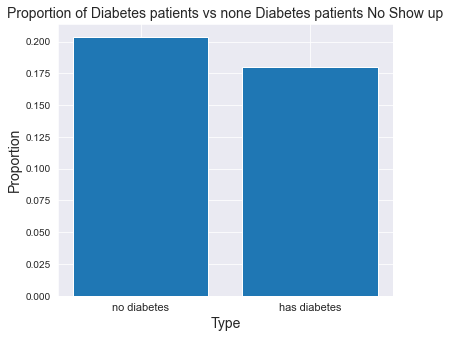

In [101]:
plt.subplots(figsize=(6,5)) 
plt.bar(["no diabetes", "has diabetes"], diabetes)
plt.xticks(fontsize=11)
plt.title("Proportion of Diabetes patients vs none Diabetes patients No Show up", fontsize=14)
plt.xlabel("Type", fontsize=14)
plt.ylabel("Proportion", fontsize=14);

There is no huge diffrence but it shows that patients with diabetes show up little bit more.
### How likely Alcoholism patients will not show up?

In [102]:
alcoholism = df.groupby('alcoholism')['no_show'].mean()
alcoholism

alcoholism
0    0.201948
1    0.201488
Name: no_show, dtype: float64

In [103]:
df.alcoholism.sum()

3360

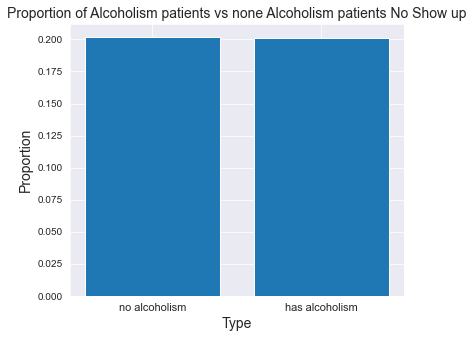

In [104]:
plt.subplots(figsize=(6,5)) 
plt.bar(["no alcoholism", "has alcoholism"], alcoholism)
plt.xticks(fontsize=11)
plt.title("Proportion of Alcoholism patients vs none Alcoholism patients No Show up", fontsize=14)
plt.xlabel("Type", fontsize=14)
plt.ylabel("Proportion", fontsize=14);

they look quite the same but note that alcoholism patients only 3360.
### Dose patients with Handcap not show up more?

In [105]:
handcap = df.groupby('handcap')['no_show'].mean()
handcap

handcap
0    0.202355
1    0.181615
Name: no_show, dtype: float64

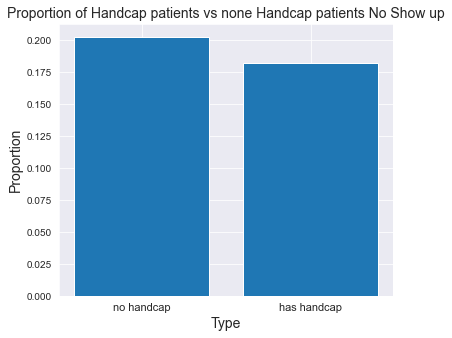

In [106]:
plt.subplots(figsize=(6,5)) 
plt.bar(["no handcap", "has handcap"], handcap)
plt.xticks(fontsize=11)
plt.title("Proportion of Handcap patients vs none Handcap patients No Show up", fontsize=14)
plt.xlabel("Type", fontsize=14)
plt.ylabel("Proportion", fontsize=14);

It shows that patients with handcap show up more.
### Is SMS message affecting whether or not patients will show up

In [107]:
sms = df.groupby('sms_received')['no_show'].mean()
sms

sms_received
0    0.167035
1    0.275745
Name: no_show, dtype: float64

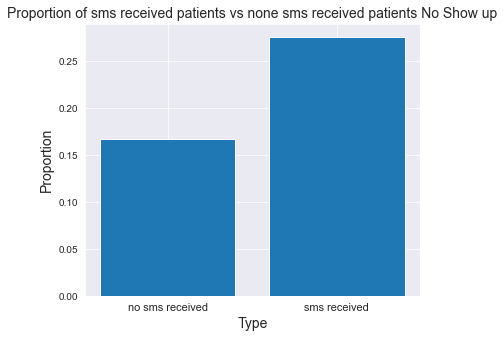

In [108]:
plt.subplots(figsize=(6,5)) 
plt.bar(["no sms received", "sms received"], sms)
plt.xticks(fontsize=11)
plt.title("Proportion of sms received patients vs none sms received patients No Show up", fontsize=14)
plt.xlabel("Type", fontsize=14)
plt.ylabel("Proportion", fontsize=14);

this one also is suprising to me i thought patients who did not receive an sms will not show up more.

<a id='conclusions'></a>
## Conclusions

in summary i find that males and females have the same show up rate, young patients tend to not show up more than old patients, `SANTOS DUMONT` has the highest no show up rate, in average patients who did not show up had 16 day delay but patients who show up waited in average 9 days, surprisingly patients with financial aid  show up less, 
Diabetes, Alcoholism, and Handcap did not appear as an huge factors
lastly and also surprisingly patients who received an sms tend to not show up more.

About the limitations, i felt like am married to the mean and i don't know other measure to do my analysis, also i did not include many different charts, i tried to use scatter plot but it did not make since 

Finally, i enjoyed working in this project, i hope you send me any improvement i could make.

Thank you for reviewing my work.

-Abdullah Majed
